<a href="https://colab.research.google.com/github/ragomez7/food-cv/blob/main/food_cv_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get helper functions
Importing helper functions from github repositrory to do tasks related with data preprocessing, data visualization, and more.

In [1]:
!wget https://raw.githubusercontent.com/ragomez7/food-cv/main/helper_functions.py

--2021-08-01 23:59:19--  https://raw.githubusercontent.com/ragomez7/food-cv/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10294 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.05K  --.-KB/s    in 0s      

2021-08-01 23:59:19 (103 MB/s) - ‘helper_functions.py’ saved [10294/10294]



In [2]:
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 33.6 MB/s 
     |████████████████████████████████| 462 kB 62.6 MB/s 
     |████████████████████████████████| 2.9 MB 52.0 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the Food 101 Dataset from TensorFlow Datasets

In [4]:
# Load in the data (takes about 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteEQNJ1K/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteEQNJ1K/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


### Exploring the data

In [5]:
ds_info.description

"This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels."

In [6]:
ds_info.splits

{'train': <tfds.core.SplitInfo num_examples=75750>,
 'validation': <tfds.core.SplitInfo num_examples=25250>}

In [7]:
# Features of Food101 TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
num_classes = ds_info.features["label"].num_classes
class_names = ds_info.features["label"].names
print(f"The number of classes in the dataset is: {num_classes}")

The number of classes in the dataset is: 101


In [9]:
#Printing all the class names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the training the data

In [10]:
train_one_sample = train_data.take(1)
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 23
  Class name (str form): churros
        


Getting acquainted with all the different image shapes

In [11]:
image_shapes = []
label_values = []
for image, label in train_data.take(30000):
  image_shapes.append(image.shape.as_list())
  label_values.append(label)

In [12]:
unique_shapes = len(np.unique(image_shapes,axis=0))
unique_labels = len(np.unique(label_values))
print(f"""
    Images come in plenty of different shapes, by taking a sample of 30,000 images 
    from the training set, we get a total amount of unique shapes of {unique_shapes}.
    As expected, the number of unique values that labels take are {unique_labels}, ranging
    from {min(label_values)} to {max(label_values)}
    """
    )


    Images come in plenty of different shapes, by taking a sample of 30,000 images 
    from the training set, we get a total amount of unique shapes of 351.
    As expected, the number of unique values that labels take are 101, ranging
    from 0 to 100
    


## Getting acquainted with the image tensor

In [13]:
for image,label in train_one_sample:
  image, label

tf.Tensor(
[[[230 229 183]
  [231 230 184]
  [232 231 183]
  ...
  [232 233 202]
  [229 234 204]
  [229 236 205]]

 [[228 227 179]
  [227 226 178]
  [226 226 176]
  ...
  [234 235 204]
  [232 237 207]
  [234 241 210]]

 [[229 229 175]
  [229 229 175]
  [227 227 175]
  ...
  [233 234 202]
  [232 237 205]
  [235 242 209]]

 ...

 [[119  97  58]
  [131 109  70]
  [131 109  70]
  ...
  [239 241 220]
  [238 240 219]
  [238 240 219]]

 [[120  98  61]
  [133 111  74]
  [135 113  76]
  ...
  [240 242 221]
  [240 242 221]
  [240 242 221]]

 [[136 114  77]
  [135 113  76]
  [129 107  70]
  ...
  [243 245 224]
  [244 246 225]
  [245 247 226]]], shape=(384, 512, 3), dtype=uint8)


(-0.5, 511.5, 383.5, -0.5)

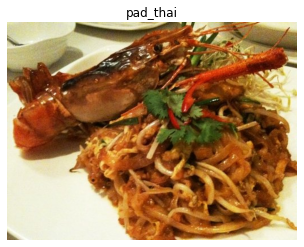

In [14]:
print(image)
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)


### Assessing that the pixel value range is normal

In [15]:
print(f"""
      Range of pixels = ({tf.reduce_min(image)}-{tf.reduce_max(image)})
"""
)


      Range of pixels = (0-255)



> Loaded image tensors are of dtype=uint8. Will need to convert to floats and normalize from 0-1 later on.

## Creating a function to:
* Help visualize images from the training set.
* Confirm the labels are correct.

In [16]:
def plot_9_images(data):
  """
  Plots 9 random images from training dataset.
  """
  images_to_plot = data.take(9)
  image_list = []
  label_list = []
  for image, label in images_to_plot:
    image_list.append(image)
    label_list.append(label)
  plt.figure(figsize=(20,20))
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_list[i-1])
    plt.title(class_names[label_list[i-1].numpy()], fontsize = 16)
    plt.axis(False)

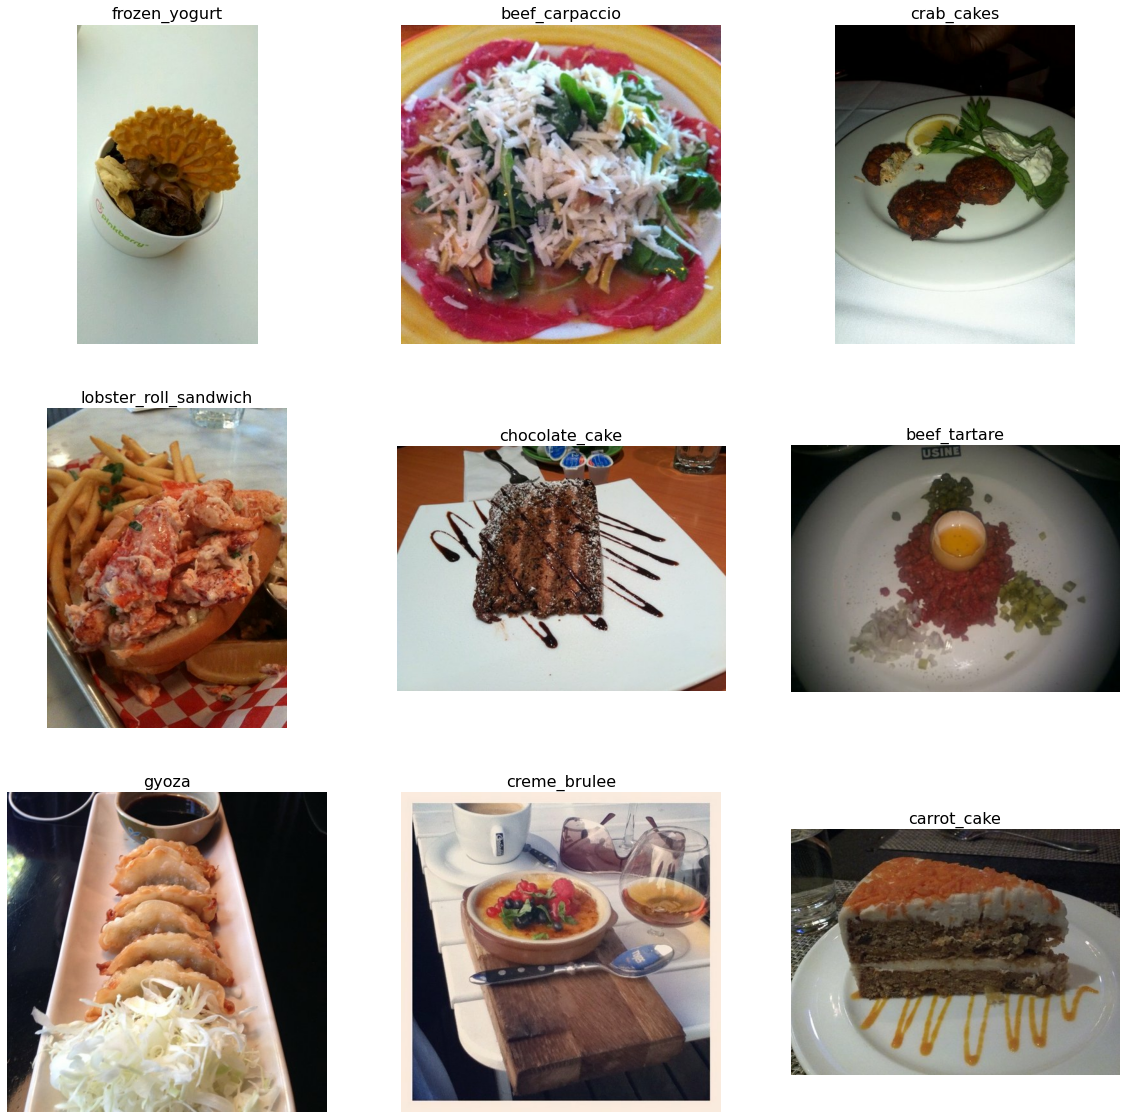

In [17]:
plot_9_images(train_data)

## Creating a preprocessing function
Now that we are initially acquainted with the data, we are going to create a function that preprocesses the image tensors in order for them to be fit for a the neural network architecture we are going to use.

The following function:
* Converts tensor dtype from `uint8` to `float32`
* Reshapes all different image sizes to the same shape. Function default is (224, 224).

We are not going to scale the images from 0-1 because we are initially going to use EfficientNetB0 architecture, which scales tensors by default.
* A good implementation idea is to later add functionality to scale the tensors if needed.

In [18]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes image to
  [img_shape, img_shape, color_channels]
  """
  img_shape = img_shape
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple



## Batch & Prepare Datasets
Using the [tf.data API](https://www.tensorflow.org/guide/data) we are going to:


*   Map the preprocess_img function to the entire training and testing set.
*   Reshuffle the datasets
*   Batch datasets with batch_size=32
*   Prefetch and parallelize the process for faster execution



In [19]:
data_shape_before = train_data.element_spec[0].shape #save the training_data shape before processing
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, #apply function to all the instances 
                             num_parallel_calls=tf.data.AUTOTUNE) #parallelizing

# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

data_shape_after = train_data.element_spec[0].shape  #save the training_data shape after processing

print(f"""
  Before the transformation, the dataset was comprised of 75,750 elements. The shape of the 
  dataset was {data_shape_before}.
  After the transformation, the dataset is comprised of {len(train_data)} batches of the
  shape {data_shape_after}.
  Batching the dataset will improve compute speed.
"""
)
# Map prepreprocessing function to test data
test_data = test_data.map(map_func=preprocess_img,  #apply function to all the instances 
                          num_parallel_calls=tf.data.AUTOTUNE)  #parallelizing

# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)



  Before the transformation, the dataset was comprised of 75,750 elements. The shape of the 
  dataset was (None, None, 3).
  After the transformation, the dataset is comprised of 2368 batches of the
  shape (None, 224, 224, 3).
  Batching the dataset will improve compute speed.



## Creating callbacks
*   To save the model's progress

In [34]:
# Create TensorBoard callback function (already have "create_tensorboard_callback()" from a previous notebook)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved



In [21]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-475189ee-71be-0aa2-8f48-78cc5e9e9eb9)


## Enabling Mixed Precision Training
Leverage the power of GPU 16-bit computation to adjust precision when needed to drastically speed up computation.

In [22]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [23]:
mixed_precision.global_policy() # should output "mixed_float16"

<Policy "mixed_float16">

## Transfer Learning
### Building a Feature Extraction Model

We're going to use [EfficientNet](https://paperswithcode.com/method/efficientnet), which is an architecture trained on ImageNet that achieved state-of-the-art accuracy on several research datasets, to:
* Build a feature extraction model: Plug in EfficientNet and add an Average Pooling Layer and a Dense layer that adapts to the 101 classes in the dataset.
* Then unfreeze layers and see what happens with our metrics.

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
# Check out our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data, 
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20210714-021647
Epoch 1/3
2368/2368 [==============================] - 179s 72ms/step - loss: 2.3334 - accuracy: 0.4615 - val_loss: 1.2145 - val_accuracy: 0.6811
Epoch 2/3
2368/2368 [==============================] - 169s 71ms/step - loss: 1.3185 - accuracy: 0.6597 - val_loss: 1.1234 - val_accuracy: 0.7015
Epoch 3/3
2368/2368 [==============================] - 166s 69ms/step - loss: 1.1394 - accuracy: 0.7055 - val_loss: 1.0880 - val_accuracy: 0.7087


In [ ]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 55s 69ms/step - loss: 1.0896 - accuracy: 0.7072


[1.0896365642547607, 0.7071683406829834]

In [ ]:
#datadir = !pwd
#datadir

In [ ]:
import os
#save_path = '/content/drive/My Drive/Colab_Notebooks'
#file_name = "test.txt"
#completeName = os.path.join(save_path, file_name)

#print(completeName)
##f = open(completeName,"w")
#f.write("Testing")
#f.close

## Saving Feature Extraction Model in Google Drive for future use

### Changing directory to where we want to save the model

In [22]:
!pwd
%cd drive/MyDrive/Food_101/models/

/content
/content/drive/MyDrive/Food_101/models


### Creating save_dir directory

In [23]:
# # Create save path to drive 
save_dir = "efficientnetb0_feature_extraction/"
os.makedirs(save_dir) # Make directory if it doesn't exist

NameError: ignored

### Saving the model

In [ ]:
# # Save model
model.save(save_dir)

INFO:tensorflow:Assets written to: efficientnetb0_feature_extraction/assets


INFO:tensorflow:Assets written to: efficientnetb0_feature_extraction/assets


### Loading the model

In [ ]:
model = tf.keras.models.load_model(save_dir)

In [ ]:
model.summary()
#The model now loads with all the once untrainable parameters now trainable.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 4,136,929
Non-trainable params: 42,023
_________________________________________________________________


## Finetuning our model.

We want to unfreeze the top 50 layers first, train the model with a lower learning rate, then


> Let's check 

In [ ]:
# Are any of the layers in our model frozen?
#for layer in model.layers:
#  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)
for layer in model.layers[1].layers:
  layer.trainable = True #set all layers trainable
for layer in model.layers[1].layers[:-50]:
  layer.trainable = False # set all layers trainable=False except the last 50
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_2 False float32 <Policy "float32">
rescaling_1 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "float32">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False float

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "50unfreezed_fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 2,656,245
Non-trainable params: 1,522,707
_________________________________________________________________


In [ ]:
# Start to fine-tune (all layers)
history_101_food_classes_fine_tune_50_last_layers_unfreezed = model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        initial_epoch=history_101_food_classes_feature_extract.epoch[-1],callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning_50_unfreezed"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr],
                                                                    ) # reduce the learning rate after X epochs of no improvements

2368/2368 [==============================] - 178s 75ms/step - loss: 0.0516 - accuracy: 0.9876 - val_loss: 1.4729 - val_accuracy: 0.7410
Epoch 5/100
2368/2368 [==============================] - 179s 75ms/step - loss: 0.0372 - accuracy: 0.9909 - val_loss: 1.5385 - val_accuracy: 0.7338

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 6/100
2368/2368 [==============================] - 183s 77ms/step - loss: 0.0157 - accuracy: 0.9977 - val_loss: 1.6530 - val_accuracy: 0.7529


## Saving Fine Tuning (50 last layers unfreezed) Model in Google Drive for future use

### Changing directory to where we want to save the model

In [ ]:
!pwd
%cd drive/MyDrive/Food_101/models/

/content/drive/My Drive/Food_101/models
[Errno 2] No such file or directory: 'drive/MyDrive/Food_101/models/'
/content/drive/MyDrive/Food_101/models


### Creating save_dir directory

In [43]:
# # Create save path to drive 
save_dir = "efficientnetb0_finetune_last_50_unfreezed/"
#os.makedirs(save_dir) # Make directory if it doesn't exist

### Saving the model

In [ ]:
# # Save model
model.save(save_dir)

INFO:tensorflow:Assets written to: efficientnetb0_finetune_last_50_unfreezed/assets


INFO:tensorflow:Assets written to: efficientnetb0_finetune_last_50_unfreezed/assets


### Loading Finetuning (50 last layers unfreezed) model

In [44]:
model = tf.keras.models.load_model(save_dir)

### Finally training the model with all layers unfreezed

In [45]:
# Are any of the layers in our model frozen?
#for layer in model.layers:
#  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)
for layer in model.layers[1].layers:
  layer.trainable = True #set all layers trainable
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_2 True float32 <Policy "float32">
rescaling_1 True float32 <Policy "mixed_float16">
normalization_1 True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float16">
block2a_expand_bn True float32 <Policy "mixed_f

In [46]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "all_unfreezed_fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [47]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [48]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 4,136,929
Non-trainable params: 42,023
_________________________________________________________________


In [51]:
# Start to fine-tune (all layers)
history_101_food_classes_fine_tune_all_layers_unfreezed = model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        initial_epoch=history_101_food_classes_fine_tune_50_last_layers_unfreezed.epoch[-1],callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning_all_unfreezed"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr],
                                                                    ) # reduce the learning rate after X epochs of no improvements

NameError: ignored

## Saving Fine Tuning (all layers unfreezed) Model in Google Drive for future use

### Changing directory to where we want to save the model

In [36]:
!pwd
%cd drive/MyDrive/Food_101/models/

/content/drive/MyDrive/Food_101/models
[Errno 2] No such file or directory: 'drive/MyDrive/Food_101/models/'
/content/drive/MyDrive/Food_101/models


### Creating save_dir directory

In [28]:
# # Create save path to drive 
save_dir = "efficientnetb0_finetune_all_layers_unfreezed/"
#os.makedirs(save_dir) # Make directory if it doesn't exist

### Saving the model

In [ ]:
# # Save model
model.save(save_dir)

INFO:tensorflow:Assets written to: efficientnetb0_finetune_all_layers_unfreezed/assets


INFO:tensorflow:Assets written to: efficientnetb0_finetune_all_layers_unfreezed/assets


### Loading Finetuning (all layers unfreezed) model
* Saving model in variable model_01

In [37]:
load_dir = "efficientnetb0_finetune_all_layers_unfreezed/"
model_01 = tf.keras.models.load_model(save_dir)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [30]:
model_01.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 4,136,929
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
# Are any of the layers in our model frozen?
for layer in model.layers[1].layers:
  layer.trainable = False # set all layers to trainable
  #print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")
  # Refreeze every layer except for the last 15

for layer in model.layers[:-50]:
  layer.trainable = True
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float16">
block2a_expand_bn True float32 <Policy "mixed_float

## Fitting a model with the data from scratch, with all the layers unfrozen

In [41]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "all_unfreezed_from_zero_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [52]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [53]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune_from_zero = model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_all_layers_unfreezed_from_zero"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_all_layers_unfreezed_from_zero/20210802-013103
Epoch 1/100
2368/2368 [==============================] - 311s 126ms/step - loss: 2.2766 - accuracy: 0.4746 - val_loss: 1.2285 - val_accuracy: 0.6703
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 2/100
2368/2368 [==============================] - 299s 124ms/step - loss: 1.1656 - accuracy: 0.6921 - val_loss: 1.0841 - val_accuracy: 0.7135
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 3/100
2368/2368 [==============================] - 297s 122ms/step - loss: 0.9958 - accuracy: 0.7308 - val_loss: 1.0545 - val_accuracy: 0.7132
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 4/100
2368/2368 [==============================] - 294s 123ms/step - loss: 0.8643 - accuracy: 0.7596 - val_loss: 1.0006 - val_accuracy: 0.7222
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 5/100
2368/2368 [==============================] - 293s 123ms/step - loss: 0.7774 - accuracy: 0.7861 - val_loss: 0.9625 - val_accuracy: 0.7365
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 6/100
2368/2368 [==============================] - 292s 123ms/step - loss: 0.6552 - accuracy: 0.8089 - val_loss: 0.9731 - val_accuracy: 0.7354
Epoch 7/100
2368/2368 [==============================] - 293s 123ms/step - loss: 0.6245 - accuracy: 0.8190 - val_loss: 0.9683 - val_accuracy: 0.7418

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 8/100
2368/2368 [==============================] - 294s 124ms/step - loss: nan - accuracy: 0.9266 - val_loss: 0.8849 - val_accuracy: 0.8053
INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


INFO:tensorflow:Assets written to: all_unfreezed_fine_tune_checkpoints/assets


Epoch 9/100
2368/2368 [==============================] - 292s 123ms/step - loss: nan - accuracy: 0.9832 - val_loss: 1.1301 - val_accuracy: 0.7982
Epoch 10/100
2368/2368 [==============================] - 291s 122ms/step - loss: nan - accuracy: 0.9898 - val_loss: 1.1802 - val_accuracy: 0.7921

Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 11/100
2368/2368 [==============================] - 291s 122ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 1.2952 - val_accuracy: 0.8088


In [54]:
# # Create save path to drive 
save_dir = "efficientnetb0_finetune_all_layers_unfrozen_from_zero/"
#os.makedirs(save_dir) # Make directory if it doesn't exist

In [55]:
# # Save model
model.save(save_dir)

INFO:tensorflow:Assets written to: efficientnetb0_finetune_all_layers_unfrozen_from_zero/assets


INFO:tensorflow:Assets written to: efficientnetb0_finetune_all_layers_unfrozen_from_zero/assets


### Loading All_Layers_Unfrozen_From_Zero model 
* Saving loaded model to variable model_02

In [56]:
load_dir = "efficientnetb0_finetune_all_layers_unfrozen_from_zero/"
model_02 = tf.keras.models.load_model(load_dir)

In [39]:
model_01.evaluate(test_data)

790/790 [==============================] - 91s 73ms/step - loss: 1.0847 - accuracy: 0.7080


[1.0847336053848267, 0.7080000042915344]

In [57]:
model_02.evaluate(test_data)

790/790 [==============================] - 59s 73ms/step - loss: 1.2506 - accuracy: 0.8120


[1.2505980730056763, 0.8120396137237549]

## Creating TensorBoard to visualize Training Histories.

Essentially we took two paths to train the model.

Finetuning path:

1.   Finetuning path



*   Created an initial feature extraction model using EfficientNet B0 architecture.
*   Finetuned this model first by unfreezing the 50 top layers.
*   Completed finetuning by unfreezing all layers.





2.   Traditional path

*    Trained the model by unfreezing all the layers from scratch.

> Note: For all of the previous models, as seen in the notebook, early stopping was used.

This TensorBoard will help us visualize the training history of both paths. 

We initially thought that through finetuning we were going to be able to squeeze more model abstraction from the data. However, by training the model with all unfreezed layers from scratch we were able to train the model for one extra epoch, and went from 0.71 to 0.81 accuracy. A substantial increment.

More experimentation and model analysis should be done to improve.


In [59]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./training_logs \
  --name "Food vision models performance." \
  --description "A TensorBoard that displays the training history of several models that were fit to Food Vision 101." \
  --one_shot # exits the uploader when upload has finished


2021-08-02 02:39:28.340230: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/KGVjPxiKSpWm0Ua7sZm5RQ/

[2021-08-02T02:39:30] Started scanning logdir.
[2021-08-02T02:39:34] Total uploaded: 92 scalars, 0 tensors, 4 binary objects (4.1 MB)
[2021-08-02T02:39:34] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/KGVjPxiKSpWm0Ua7sZm5RQ/
